In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv("ex2data1.txt", header=None)
narray = np.array(df.values)

narray

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ],
       [ 61.10666454,  96.51142588,   1.        ],
       [ 75.02474557,  46.55401354,   1.        ],
       [ 76.0987867 ,  87.42056972,   1.        ],
       [ 84.43281996,  43.53339331,   1.        ],
       [ 95.86155507,  38.22527806,   0.        ],
       [ 75.01365839,  30.60326323,   0.        ],
       [ 82.30705337,  76.4819633 ,   1.        ],
       [ 69.36458876,  97.71869196,   1.        ],
       [ 39.53833914,  76.03681085,   0.        ],
       [ 53.97105215,  89.20735014,   1.        ],
       [ 69.07014406,  52.74046973,   1.        ],
       [ 67.94685548,  46.67857411,   0.        ],
       [ 70.66150955,  92.92713789,   1.        ],
       [ 76.97878373,  47.57596

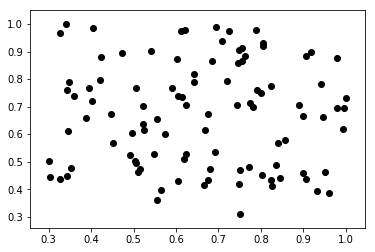

In [147]:
x_normed = narray / narray.max(axis=0)

plt.scatter(x_normed[ : , 0], x_normed[: ,1],  color='black')

plt.show()

In [148]:
def plotData(X, y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    
    p1 = plt.plot(X[pos,0], X[pos,1], marker='+', markersize=9, color='g')[0]
    p2 = plt.plot(X[neg,0], X[neg,1], marker='o', markersize=7, color='r')[0]


    return plt, p1, p2

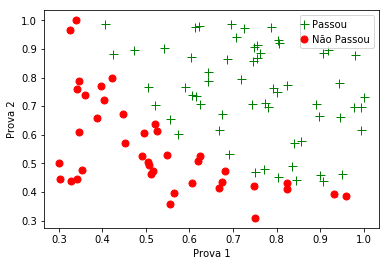

In [149]:
plt, p1, p2 = plotData(x_normed[ :  , :-1], x_normed[ : , -1])

# # Labels and Legend
plt.xlabel('Prova 1')
plt.ylabel('Prova 2')
plt.legend((p1, p2), ('Passou', 'Não Passou'), numpoints=1, handlelength=0)

plt.show()

In [150]:
xTrain = x_normed[:70]
xTest = x_normed[70 :]

In [151]:
def predict(row, coefs):
    z = coefs[0]
    for i in range(len(row)-1):
        z += coefs[i + 1] * row[i]
    ypred = 1 / (1 + np.exp(-z))
    return ypred

In [152]:
def coefficients_sgd(train, alpha, epochs):
    list_erro = []
    coefs = [0.0 for i in range(len(train[0]))]
    for epoch in range(epochs):
        np.random.shuffle(train)
        for row in train:
            ypred = predict(row, coefs)
            error = row[-1] - ypred
            
            coefs[0] = coefs[0] + alpha * error
            for i in range(len(row)-1):
                coefs[i + 1] = coefs[i + 1] + alpha * error * row[i]
        
        #print('>epoch=%d, alpha=%.3f, error=%.3f' % (epochs, alpha, sum_error/len(train[:-1])))
        
        list_erro.append(abs(error))
    
    return list_erro, coefs

In [153]:
list_erro, coefs = coefficients_sgd(xTrain, 0.01, 1000)
print(coefs)

[-10.021742524818595, 8.6805032434593219, 7.1651981121766068]


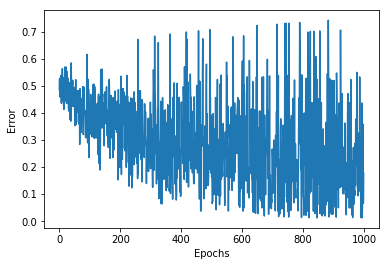

In [154]:
plt.plot(np.arange(len(list_erro)), list_erro)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()